In [1]:
# Secant.
# Bisection.
# Ridder.
# Newton.
# Newton-Raphson.

210427.ipynb


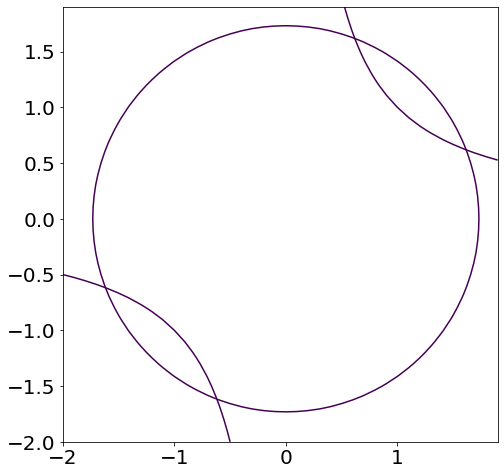

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 20})
# x^2 + y^2 - 3 = 0
# x*y - 1 = 0 

# f(x)
lim = 2.0
delta = 0.1
xdata = np.arange(-lim,lim,delta)
ydata= np.arange(-lim,lim,delta)
X, Y = np.meshgrid(xdata,ydata)


def f1(x,y):
    return x**2.0 + y**2.0 - 3

def f2(x,y):
    return x*y - 1

F1 = f1(X,Y)
F2 = f2(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.contour(X,Y,F1,[0])
plt.contour(X,Y,F2,[0])

In [12]:
from scipy.optimize import root

def f(x):
    f1 = x[0]**2.0 + x[1]**2.0 - 3.0
    f2 = x[0]*x[1] - 1.0
    return [f1,f2]

xini = [1.0, 0.0]
root(f, xini)

    fjac: array([[-0.97046157, -0.24125577],
       [ 0.24125577, -0.97046157]])
     fun: array([0.00000000e+00, 2.22044605e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([8.25178770e-12, 1.84535926e-12])
       r: array([-4.09878043, -0.78072008, -1.09108944])
  status: 1
 success: True
       x: array([1.61803399, 0.61803399])

In [22]:
def f(x):
    f1 = np.sin(x[0]) + x[1]**2 + np.log(x[2]) - 7
    f2 = 3*x[0] + 2**x[1] - x[2]**3 +1
    f3 = x[0] + x[1] + x[2] -5
    return [f1, f2, f3]

xini = [1.,1.,1.]
root(f,xini)

    fjac: array([[-2.89123927e-01, -9.15605969e-01, -2.79415576e-01],
       [ 9.57291375e-01, -2.76765456e-01, -8.36307658e-02],
       [ 7.59750852e-04,  2.91661776e-01, -9.56521213e-01]])
     fun: array([5.75216319e-10, 3.52395535e-09, 0.00000000e+00])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([ 6.18644926e-08,  7.73866142e-09, -1.87482439e-08])
       r: array([-3.57889864, -4.6852964 ,  9.88315081,  3.69654345,  3.8022166 ,
       -4.26492224])
  status: 1
 success: True
       x: array([0.59905376, 2.3959314 , 2.00501484])

In [23]:
# Secant.
# Bisection.
# Ridder.
# Newton.
# Newton-Raphson.

In [25]:
!cat ../myModules/newtonRaphson2.py

## module newtonRaphson2
''' soln = newtonRaphson2(f,x,tol=1.0e-9).
    Solves the simultaneous equations f(x) = 0 by
    the Newton-Raphson method using {x} as the initial
    guess. Note that {f} and {x} are vectors.
'''
import numpy as np
from gaussPivot import *
import math

def newtonRaphson2(f,x,tol=1.0e-9):
    def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac,f0
    for i in range(30):
        jac,f0 = jacobian(f,x)
        if math.sqrt(np.dot(f0,f0)/len(x)) < tol: return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if math.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0):
            return x
    print('Too many iterations')


In [26]:
import sys
sys.path.append('../myModules')

In [27]:
from newtonRaphson2 import newtonRaphson2

In [31]:
def f(x):
    f = np.zeros(len(x))
    f[0] = x[0]**2.0 + x[1]**2.0 - 3.0
    f[1] = x[0]*x[1] - 1.0
    return f

xini = [1,0]
newtonRaphson2(f,xini)

array([1.61803399, 0.61803399])

In [33]:
cat ../myModules/newtonRaphson.py

## module newtonRaphson
''' root = newtonRaphson(f,df,a,b,tol=1.0e-9).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
'''
def newtonRaphson(f,df,a,b,tol=1.0e-9):
    import error
    from numpy import sign
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(fa) == sign(fb): error.err("Root is not bracketed")
    x = 0.5*(a + b)
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
      # Tighten the brackets on the root
        if sign(fa) != sign(fx): b = x
        else: a = x
      # Try a Newton-Raphson step
        dfx = df(x)
# If division by zero, push x out of bounds
        try: dx = -fx/dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
# If the result is outside the brackets, use bisection
        if (b - x)*(x - a) < 0.0:
            dx = 0.5*(b - a)
      

In [32]:
cat ../myModules/ridder.py

## module ridder
''' root = ridder(f,a,b,tol=1.0e-9).
    Finds a root of f(x) = 0 with Ridder’s method.
    The root must be bracketed in (a,b).
'''
import error
import math
from numpy import sign

def ridder(f,a,b,tol=1.0e-9):
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(f2)!= sign(f3): x1 = x3; f1 = f3
    for i in range(30):
      # Compute the improved root x from Ridder’s formula
        c = 0.5*(a + b); fc = f(c)
        s = math.sqrt(fc**2 - fa*fb)
        if s == 0.0: return None
        dx = (c - a)*fc/s
        if (fa - fb) < 0.0: dx = -dx
        x = c + dx; fx = f(x)
      # Test for convergence
        if i > 0:
            if abs(x - xOld) < tol*max(abs(x),1.0): return x
        xOld = x
      # Re-bracket the root as tightly as possible
        if sign(fc) == sign(fx):
            if sign(fa)!= sign(fx): b = x; fb = fx
            else: a = x; fa = fx
        else:
            a = c; b = x; fa = fc; fb = fx
    return Non

In [56]:
import error
import math
from numpy import sign

def ridder(f,a,b,tol=1.0e-9):
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    #if sign(fa)!= sign(fb): x1 = x3; f1 = f3
    for i in range(30):
      # Compute the improved root x from Ridder’s formula
        c = 0.5*(a + b); fc = f(c)
        s = math.sqrt(fc**2 - fa*fb)
        if s == 0.0: return None
        dx = (c - a)*fc/s
        if (fa - fb) < 0.0: dx = -dx
        x = c + dx; fx = f(x)
      # Test for convergence
        if i > 0:
            if abs(x - xOld) < tol*max(abs(x),1.0): return x
        xOld = x
      # Re-bracket the root as tightly as possible
        if sign(fc) == sign(fx):
            if sign(fa)!= sign(fx): b = x; fb = fx
            else: a = x; fa = fx
        else:
            a = c; b = x; fa = fc; fb = fx
    return None
    print("Too many iterations")
    
from scipy.optimize import root_scalar

def f(x):
    return 1/((x-0.3)**2+0.01) - 1/((x-0.8)**2 + 0.04)

#ridder(f,0,1)

print(root_scalar(f,bracket=[0,1],xtol=1.0e-9).root)
print(ridder(f,0,1,tol=1.0e-9))

0.5800000000000302
0.5800000000000001


In [58]:
f = lambda x: x**2.0 - 2.
df = lambda x: 2.0*x
from newtonRaphson import newtonRaphson
newtonRaphson(f,df,0,2)

1.4142135623730951

In [64]:
# 3**(1/3)이 근이되는 공식을 쓰고 newtonRaphson 루틴을 사용하여 값을 찾으시오.

f = lambda x: x**3. - 3
df = lambda x: 3.**x

newtonRaphson(f,df,1,2)

1.4422495700448246

In [68]:
def newton(f,df,x):
    return x - f(x)/df(x)


In [87]:
x = newton(f,df,1)  

In [88]:
# Secant

In [89]:
# Bisection
# Rootsearch
# NewtonRaphson
# NewtonRaphson2

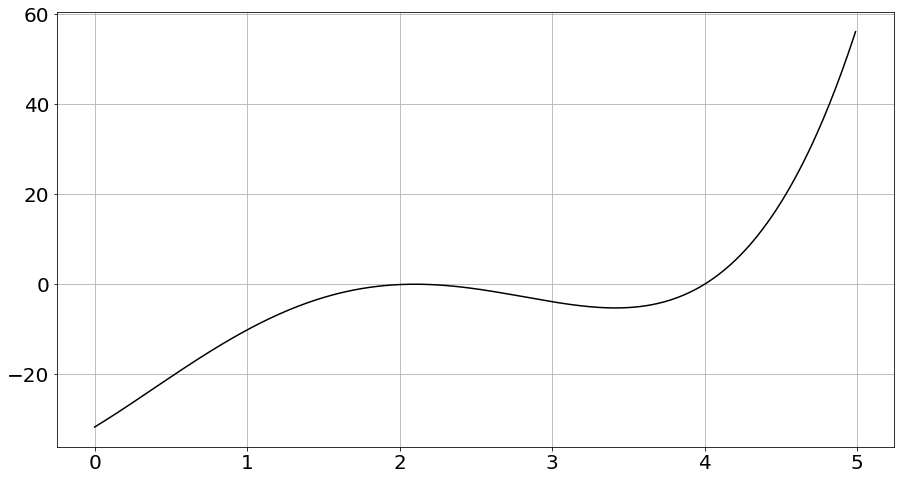

In [96]:
import matplotlib.pyplot as plt
xx = np.arange(0,5,0.01)
f = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752
df = lambda x: 4.*x**3 - 3*6.4*x**2 + 2*6.45*x + 20.538
plt.plot(xx,f(xx),'black')
plt.grid()

In [98]:
newtonRaphson(f,df,3,5)

4.000000000000001